In [1]:
import tensorflow as tf 

In [2]:
from tensorflow import keras
from tensorflow.keras import layers, models, Sequential 
from tensorflow.keras.layers import Dense, Input, Flatten, Dropout

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
train_path = '/DL_Lab/mnist-jpg/train'
test_path = '/DL_Lab/mnist-jpg/test'

In [65]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_gen = ImageDataGenerator(rescale= 1.0/255.0)

train_batch=10000
test_batch=5000

train_data = data_gen.flow_from_directory(
    train_path,
    batch_size= train_batch,
    class_mode='categorical',
    color_mode='grayscale',
    target_size=(28,28)
    
)

test_data = data_gen.flow_from_directory(
    test_path,
    batch_size= test_batch,
    class_mode='categorical',
    color_mode='grayscale',
    target_size=(28,28)
    
)
1

Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


1

In [66]:
x_train, y_train = train_data[0]
x_test , y_test = test_data[0]

In [75]:
x_test.shape

(5000, 28, 28, 1)

In [76]:
y_test.shape

(5000, 10)

In [77]:
model = Sequential([
    Input(shape=(28,28)),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(10, activation='softmax'),
])
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,650 (205.66 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [79]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=10, shuffle=True)

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.5214 - loss: 1.5395 - val_accuracy: 0.8794 - val_loss: 0.4382
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.8765 - loss: 0.4299 - val_accuracy: 0.9036 - val_loss: 0.3339
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.8978 - loss: 0.3560 - val_accuracy: 0.9156 - val_loss: 0.2944
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.9177 - loss: 0.2892 - val_accuracy: 0.9158 - val_loss: 0.2876
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.9217 - loss: 0.2665 - val_accuracy: 0.9216 - val_loss: 0.2687
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.9316 - loss: 0.2342 - val_accuracy: 0.9284 - val_loss: 0.2458
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.9381 - loss: 0.2173 - val_accuracy: 0.9332 - val_loss: 0.2327
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.9448 -

<Axes: >

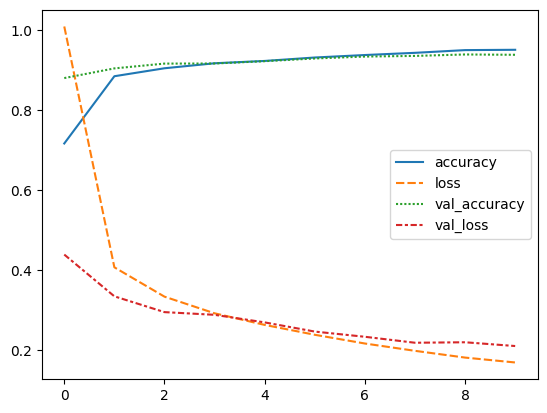

In [81]:
import seaborn as sns
sns.lineplot(history.history)

In [82]:
test_loss, test_acc=model.evaluate(x_test,y_test)
print(test_loss, test_acc)
predicted_val =model.predict(x_test)

157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9394 - loss: 0.1988
0.20960837602615356 0.9376000165939331
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step   


8

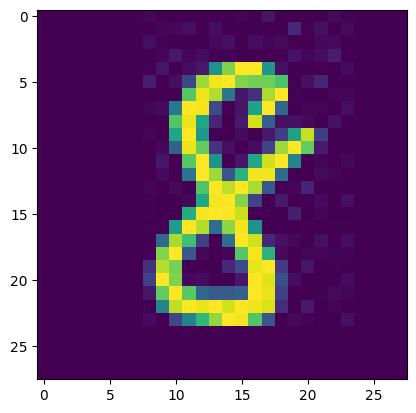

In [84]:
n=1000
plt.imshow(x_test[n])
np.argmax(y_test[n])